<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  >=3.7<br/>
<b>Networkx version:</b>  >=2.3<br/>
<b>Last update:</b> 16/02/2021
</span>

<a id='top'></a>
# *Chapter 5: Micro: Centrality & Tie Strenght*

In this notebook are introduced basilar analysis to cover node centrality and assortative mixing.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. 

In [1]:
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1], weight=int(l[2]))
    return g

# Game of Thrones data
season = 6
g = read_net_w(f'data/asioaf/got-s{season}-edges.csv')

houses = {}
with open(f'data/asioaf/got-s{season}-nodes_ext.csv') as f:
    f.readline()
    for l in f:
        node, _, house = l.rstrip().split(",")
        g.add_node(node, house=house)

# node position for plotting
pos = nx.spring_layout(g)

In [4]:
# Support function to plot networks (only small graphs)
def draw_net(G, pos, measures, measure_name):
    
    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

## Centrality measures

We can measure nodes importance using so-called centrality.

**Bad term:** 
- nothing to do with being central in general

**Usage:**
- Some centralities have straightforward interpretation
- Centralities can be used as node features for machine learning on graph


Node centrality measures can be easily computed in python using ``networkx`` as follows

### Degree Centrality

How many neighbors does a node have?

In [5]:
degrees = dict(g.degree()) # compute the degree of a set of nodes (if specified).

In [6]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 40), ('JON', 31), ('CERSEI', 27), ('TYRION', 26), ('JAIME', 24)]

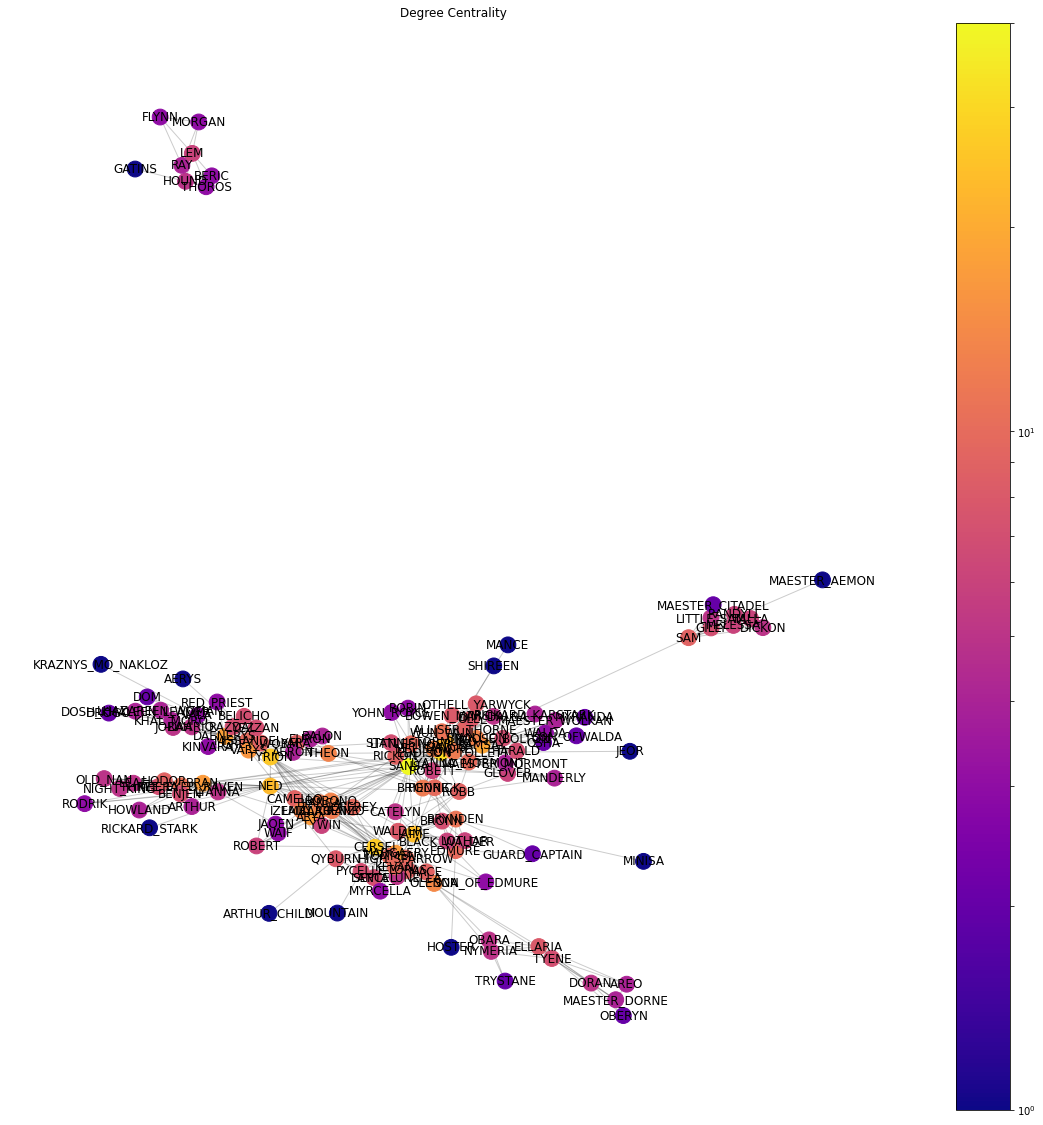

In [7]:
draw_net(g, pos, degrees, 'Degree Centrality')

### Closeness Centrality

**Farness:** average of length of shortest paths to all other nodes

**Closeness:** inverse of the Farness  (normalized by number of nodes)


In [8]:
closeness = nx.closeness_centrality(g) # compute the closeness centraliry of all nodes 

In [9]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.48437799501629286),
 ('TYRION', 0.4296366462644516),
 ('JON', 0.4238307456392563),
 ('CERSEI', 0.4181796690307329),
 ('JAIME', 0.4140392762680523)]

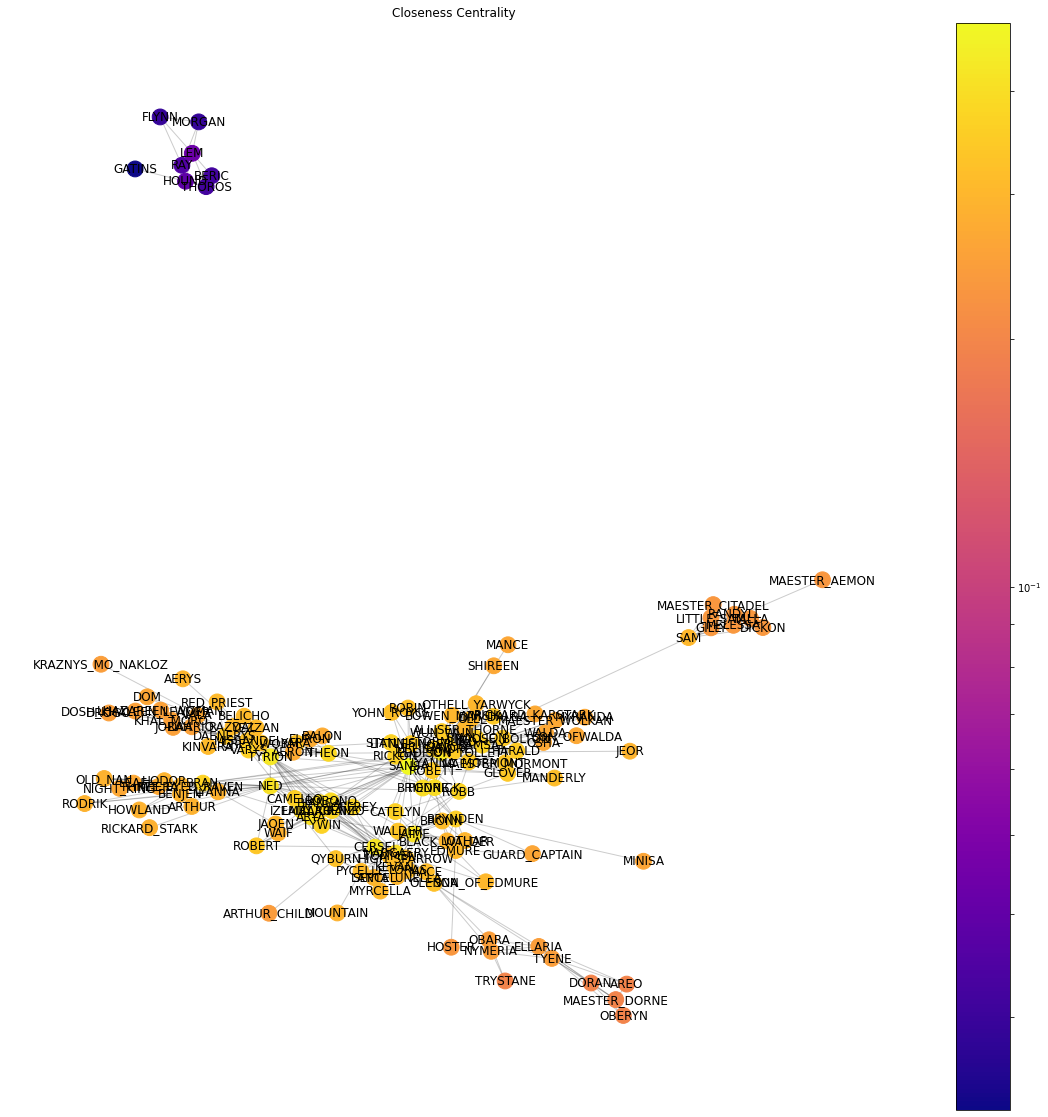

In [10]:
draw_net(g, pos, closeness, 'Closeness Centrality')

### Betweenness Centrality

Number of shortest paths that go through  a node.

**Assumption:** important vertices are bridges over which information flows

**Practically:** if information spreads via shortest paths, important nodes are found on many shortest paths


In [11]:
betweenness = nx.betweenness_centrality(g) # compute the betweenness centraliry of all nodes 

In [12]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.2626236959730493),
 ('JON', 0.19134542283724257),
 ('TYRION', 0.14853156113828941),
 ('JAIME', 0.13044955131298),
 ('CERSEI', 0.11721858119776944)]

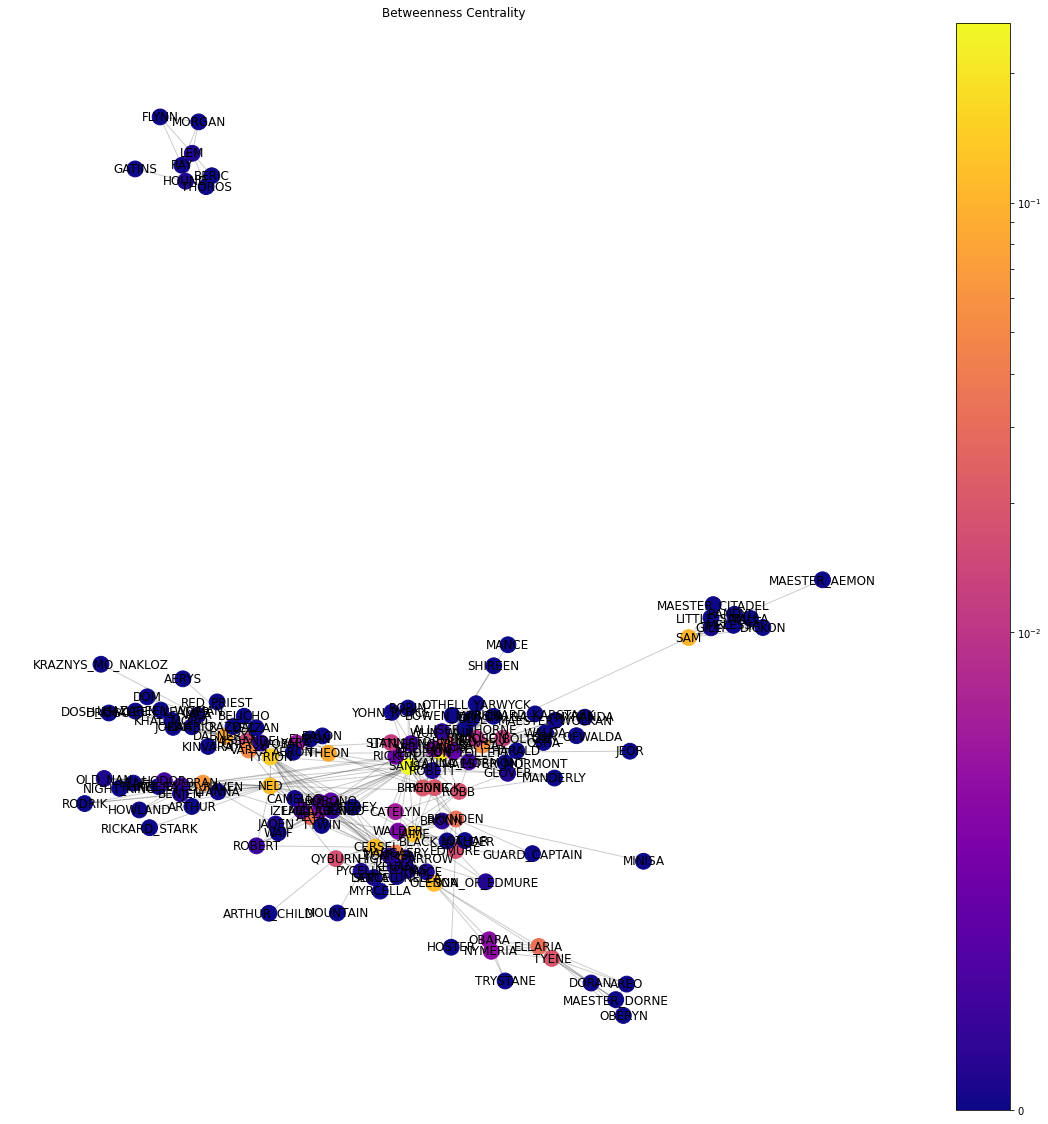

In [13]:
draw_net(g, pos, betweenness, 'Betweenness Centrality')

### Harmonic Centrality

Harmonic mean of the geodesic (shorted paths) distances from a given node to all others.


In [14]:
harmonic = nx.harmonic_centrality(g)

In [15]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 81.41666666666666),
 ('JON', 73.33333333333336),
 ('TYRION', 71.91666666666667),
 ('CERSEI', 70.5),
 ('JAIME', 69.0)]

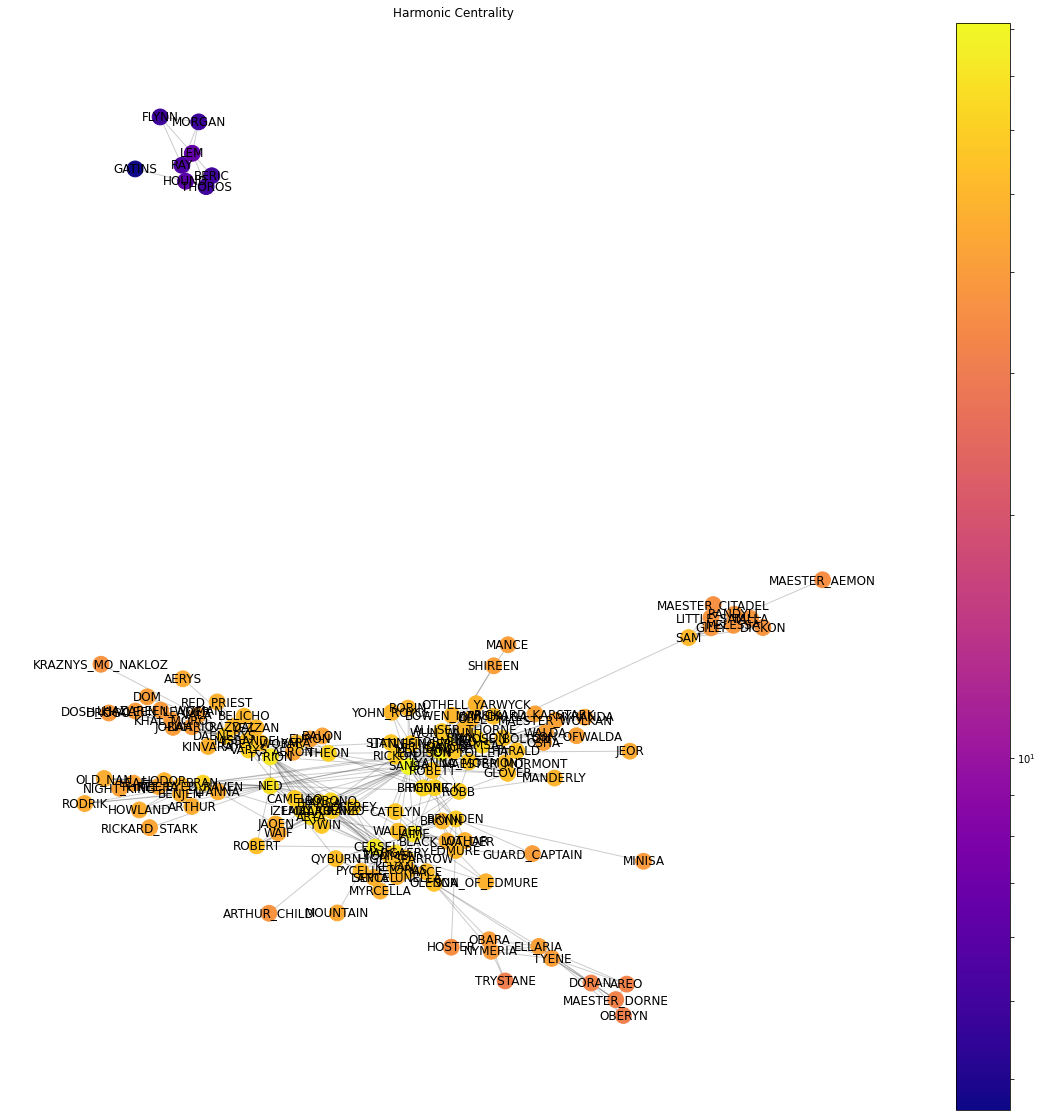

In [16]:
draw_net(g, pos, harmonic, 'Harmonic Centrality')

### PageRank 

**Main idea:** The PageRank computation can be interpreted as a Random Walk process with restart

Probability that the RW will be in node i next step depends only on the current node j and the transition probability
 j ➝ i determined by the stochastic matrix
- Consequently this is a first-order Markov process
- Stationary probabilities (i.e., when walk length tends towards ∞ ) of the RW to be in node i gives the PageRank of the node


In [17]:
pagerank = nx.pagerank(g)

In [18]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JON', 0.03986644981348079),
 ('SANSA', 0.03581899420907483),
 ('TYRION', 0.030570531087226026),
 ('JAIME', 0.029124740576154027),
 ('DAVOS', 0.025908297778490293)]

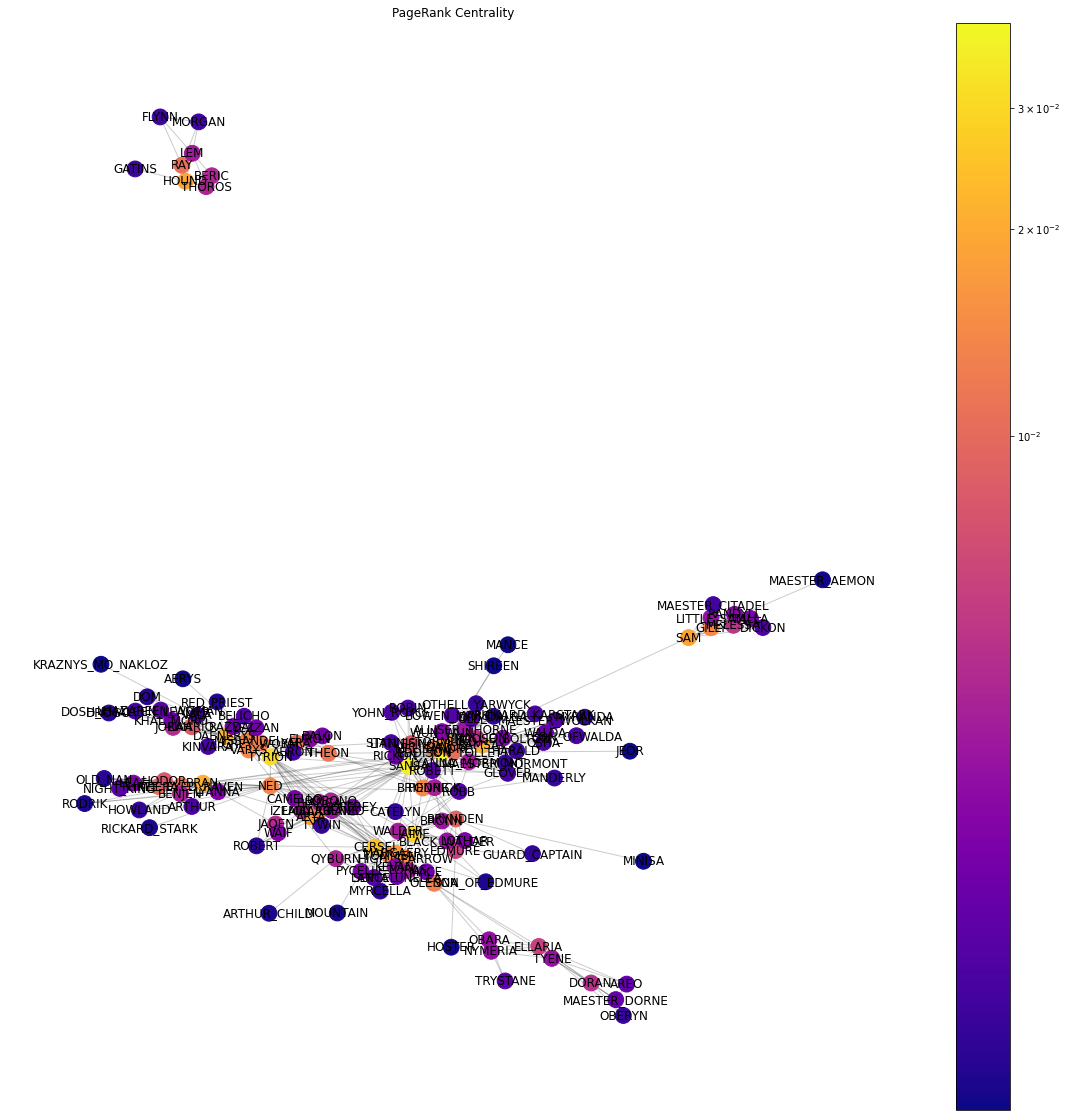

In [19]:
draw_net(g, pos, pagerank, 'PageRank Centrality')

### Eigenvector Centrality

A pair of eigenvector (x) and eigenvalue (λ) is defined by the relation:

    Ax = λx

- x is a vector of size N that can be interpreted as the nodes scores
- Ax yield a new vector of the same size which corresponds for each node to the sum of the received scores from its neighbors
- the equality implies that the new scores are proportional to the previous ones


In [20]:
eigen = nx.eigenvector_centrality(g)

In [21]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.368170325062005),
 ('JON', 0.25752583885620867),
 ('DAVOS', 0.21209191961222368),
 ('TORMUND', 0.204735556751076),
 ('TYRION', 0.200968439452155)]

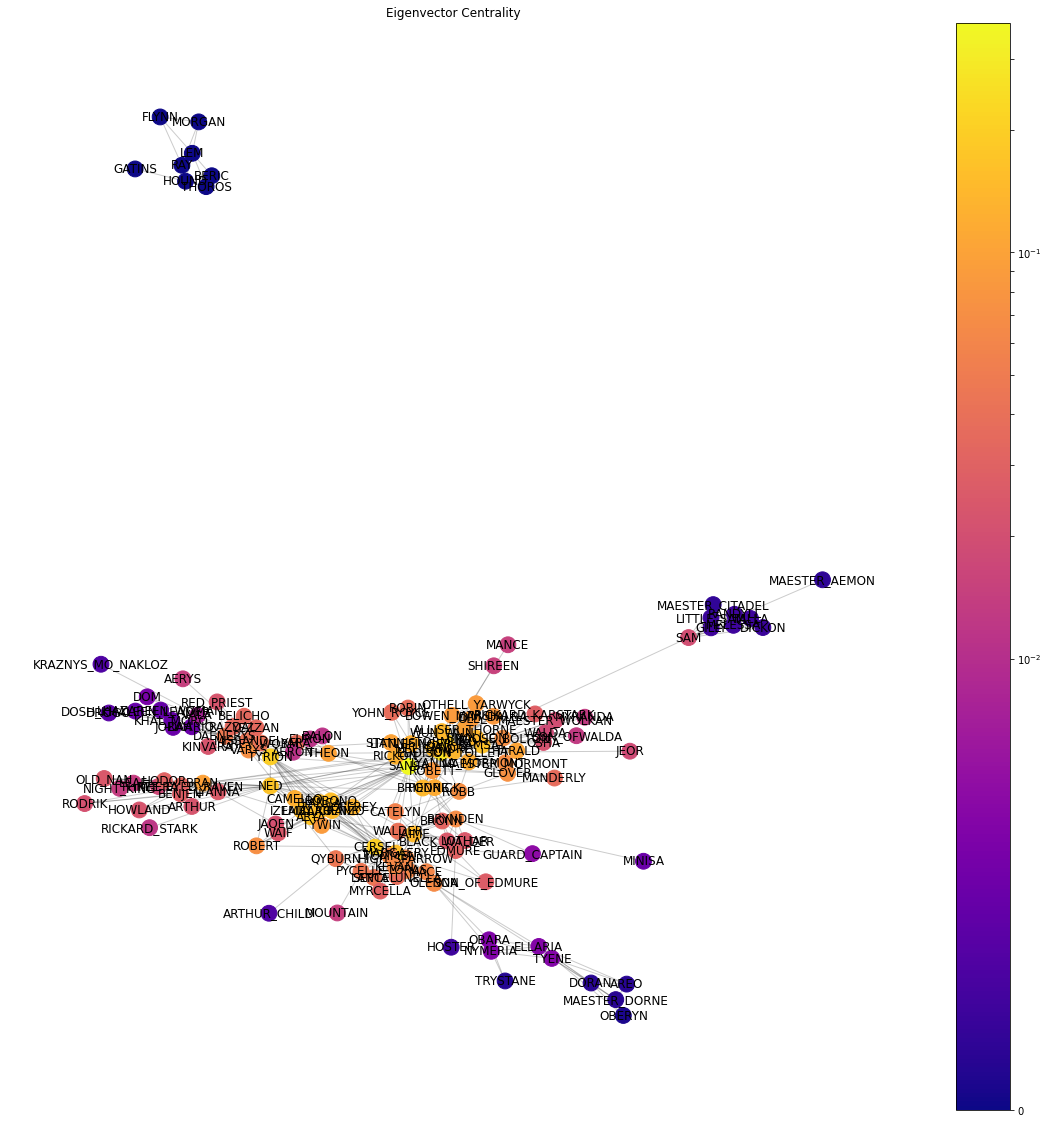

In [22]:
draw_net(g, pos, eigen, 'Eigenvector Centrality')

## Bridges and Local Bridges

Checking if graph has bridges

In [23]:
nx.has_bridges(g)

True

Enumerating all bridges in the graph

In [24]:
list(nx.bridges(g))

[('JON', 'SAM'),
 ('JON', 'JEOR'),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ'),
 ('TYRION', 'AERYS'),
 ('DAVOS', 'SHIREEN'),
 ('SAM', 'MAESTER_AEMON'),
 ('CERSEI', 'MOUNTAIN'),
 ('TORMUND', 'MANCE'),
 ('HOUND', 'GATINS'),
 ('BRYNDEN', 'MINISA'),
 ('EDMURE', 'HOSTER'),
 ('QYBURN', 'ARTHUR_CHILD'),
 ('NED', 'RICKARD_STARK')]

Listing all local bridges in the graph and computing the span (i.e., the shortest path length between the endpoints if the local bridge is removed)

In [25]:
list(nx.local_bridges(g, with_span=True))

[('JON', 'SAM', inf),
 ('JON', 'JEOR', inf),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ', inf),
 ('TYRION', 'AERYS', inf),
 ('VARYS', 'STANNIS', 3),
 ('ARYA', 'WALDER', 3),
 ('DAVOS', 'SHIREEN', inf),
 ('SAM', 'MAESTER_AEMON', inf),
 ('CERSEI', 'MOUNTAIN', inf),
 ('TORMUND', 'MANCE', inf),
 ('HOUND', 'GATINS', inf),
 ('BRYNDEN', 'MINISA', inf),
 ('EDMURE', 'HOSTER', inf),
 ('QYBURN', 'ARTHUR_CHILD', inf),
 ('NED', 'RICKARD_STARK', inf)]

## Tie Strength
Measuring Tie Strength for each pair of nodes in the graph through Neighborhood Overlap

In [26]:
def node_overlap(g):
    for u, v in g.edges():
        n_u = set(g.neighbors(u)) # set of u neighbors
        n_v = set(g.neighbors(v)) # set of v neighbors
        overlap = len(n_u & n_v) / len(n_u | n_v) # Neighborhood Overlap
        g[u][v]['overlap'] = overlap
    return g

In [27]:
g = node_overlap(g)

Plotting the KDE (Kernel Density Estimation) of Neighborhood Overlap

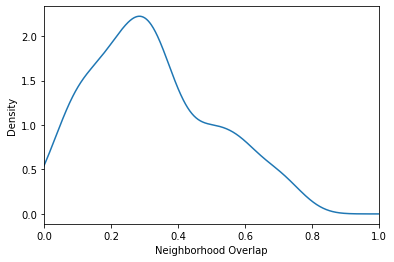

In [28]:
weights = [e[-1]['overlap'] for e in g.edges(data=True)] 
pd.DataFrame(weights)[0].plot.kde()
plt.xlabel("Neighborhood Overlap")
plt.xlim(0,1)
plt.show()

Plotting the KDE (Kernel Density Estimation) of Interactions Weights

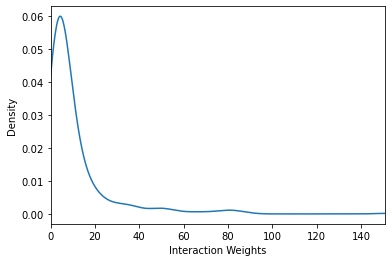

In [29]:
weights_got = [d['weight'] for u,v,d in g.edges(data=True)]
pd.DataFrame(weights_got)[0].plot.kde()
plt.xlabel("Interaction Weights")
plt.xlim(0,max(weights_got))
plt.show()